In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
diamonds['cut'].mean

<bound method Series.mean of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object>

In [5]:
diamonds['cut'].value_counts

<bound method IndexOpsMixin.value_counts of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object>

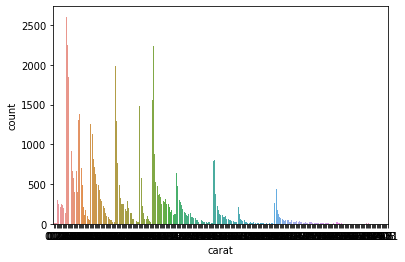

In [6]:
sns.countplot(diamonds['carat'])

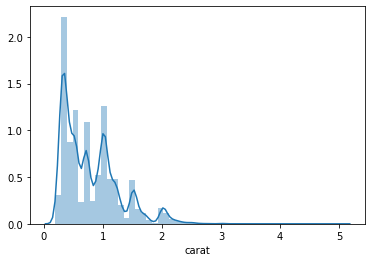

In [7]:
sns.distplot(diamonds['carat'])

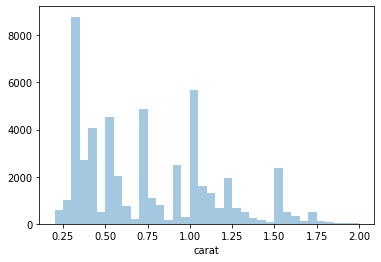

In [8]:
sns.distplot(diamonds['carat'],kde=False, bins=np.arange(0.2,2.05,.05).tolist())

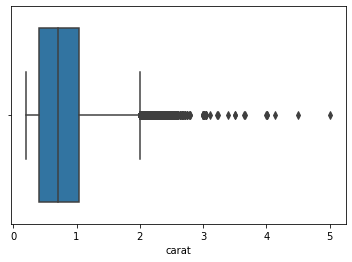

In [9]:
sns.boxplot(diamonds['carat'])

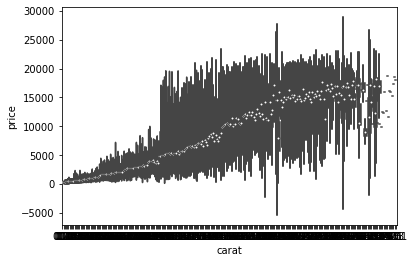

In [10]:
sns.violinplot(data=diamonds,x='carat',y='price')

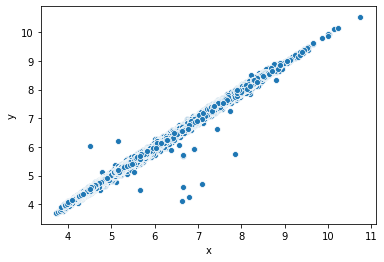

In [11]:
sns.scatterplot(data=diamonds.query('y < 20 & x > 2.5'),x='x',y='y') #let's fix this graph, deal with the outliers (depends), winsorize everything

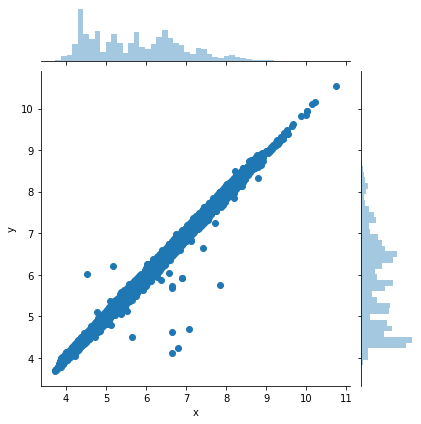

In [12]:
sns.jointplot(data=diamonds.query('y < 20 & x > 2.5'),x='x',y='y')

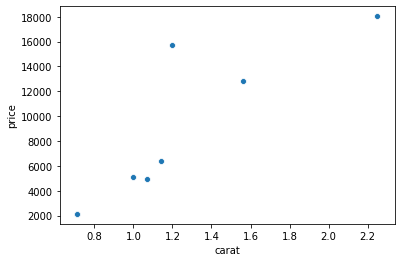

In [13]:
# how is carat related to price? 

sns.scatterplot(data=diamonds.query('y < 3000 & x < 1'), x='carat',y='price')

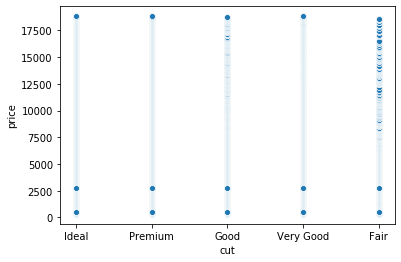

In [14]:
# how is cut related to price?

sns.scatterplot(data=diamonds, x='cut',y='price')

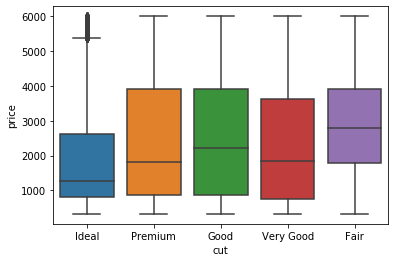

In [15]:
sns.boxplot(data=diamonds.query('price < 6000'),x='cut',y='price')

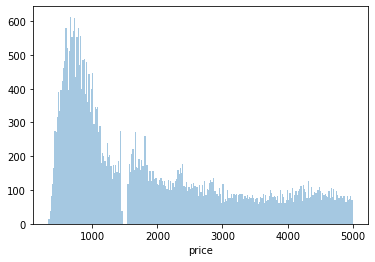

In [16]:
sns.distplot(diamonds.query('price<5000')['price'],kde=False,bins=250)

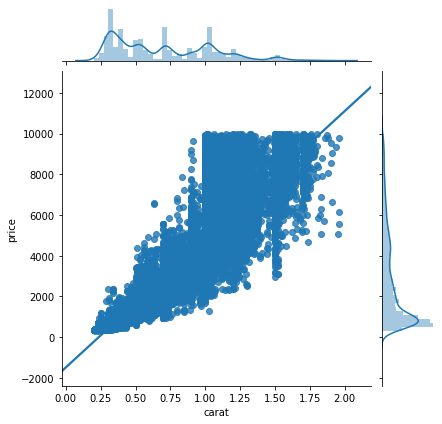

In [17]:
# how is carat related to price? ; kind=resid, reg, kde, etc.

sns.jointplot(data=diamonds.query('carat<2 & price<10000'),y='price',x='carat',kind='reg')

# 

In [18]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834
...,...,...,...
2020-02-11,319.609985,184.440002,58.689999
2020-02-12,327.200012,184.710007,58.230000
2020-02-13,324.869995,183.710007,58.650002


In [19]:
# this is wide data... so if we want to create a new variable, we have to do it once for each firm...
# what if we have 1000 firms? seems tough to do...
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['Firm','Date','Adj Close']
stock_prices # print - now that is formatted nicely, like CRSP! 

# note: we might have to tweak the regression section of "Simple Program"
# to work with the long data, but I suspect that it would be shorter code and 
# more "generally applicable" (ie easily work with N=1000+ firms)

,Firm,Date,Adj Close
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
...,...,...,...
15184,VZ,2020-02-11,58.689999
15185,VZ,2020-02-12,58.230000
15186,VZ,2020-02-13,58.650002
15187,VZ,2020-02-14,58.509998


In [20]:
# add return var.
# MAKE SURE YOU CREATE THE VARIABLES WITHIN EACH FIRM - use groupby
stock_prices['ret'] = stock_prices.groupby('Firm')['Adj Close'].pct_change()
stock_prices # print - the first ret for each firm should be missing...b

,Firm,Date,Adj Close,ret
0,AAPL,2000-01-03,3.470226,NaN
1,AAPL,2000-01-04,3.177650,-0.084310
2,AAPL,2000-01-05,3.224152,0.014634
3,AAPL,2000-01-06,2.945139,-0.086538
4,AAPL,2000-01-07,3.084645,0.047368
...,...,...,...,...
15184,VZ,2020-02-11,58.689999,-0.025730
15185,VZ,2020-02-12,58.230000,-0.007838
15186,VZ,2020-02-13,58.650002,0.007213
15187,VZ,2020-02-14,58.509998,-0.002387


In [21]:
stock_prices['ret'].isna().sum()

3

In [22]:
stock_prices.groupby('Firm')     ['ret'].describe() #for each firm, describe the return variable

,count,mean,std,min,25%,50%,75%,max
Firm,,,,,,,,
AAPL,5062.0,0.001229,0.025349,-0.518692,-0.010330,0.000895,0.012943,0.139049
MSFT,5062.0,0.000497,0.018964,-0.155977,-0.008038,0.000338,0.008928,0.195652
VZ,5062.0,0.000321,0.015347,-0.118461,-0.007231,0.000369,0.007702,0.146324


In [23]:
help(stock_prices['ret'].isnull)

Help on method isnull in module pandas.core.series:

isnull() method of pandas.core.series.Series instance
    Detect missing values.
    
    Return a boolean same-sized object indicating if the values are NA.
    NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
    values.
    Everything else gets mapped to False values. Characters such as empty
    strings ``''`` or :attr:`numpy.inf` are not considered NA values
    (unless you set ``pandas.options.mode.use_inf_as_na = True``).
    
    Returns
    -------
    Series
        Mask of bool values for each element in Series that
        indicates whether an element is not an NA value.
    
    See Also
    --------
    Series.isnull : Alias of isna.
    Series.notna : Boolean inverse of isna.
    Series.dropna : Omit axes labels with missing values.
    isna : Top-level isna.
    
    Examples
    --------
    Show which entries in a DataFrame are NA.
    
    >>> df = pd.DataFrame({'age': [5, 6, np.NaN],
    ...      

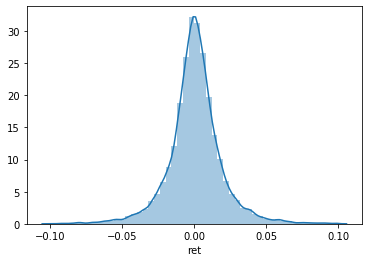

In [38]:
# q3 fig 1
sns.distplot(stock_prices.query('abs(ret)<.1')['ret'].dropna())

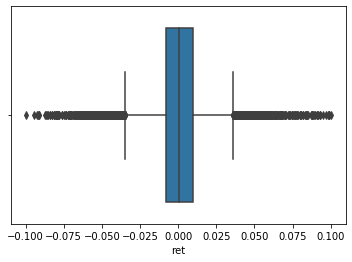

In [40]:
#q3 fig 2
sns.boxplot(data=stock_prices.query('abs(ret)<.1'),x='ret')

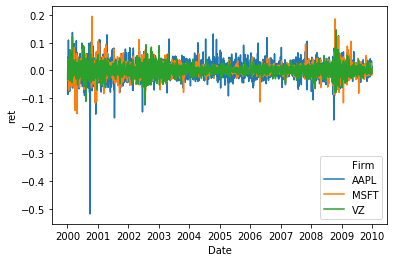

In [47]:
#q3 fig 3
sns.lineplot(data=stock_prices.query('(Date)<2010'),x='Date',y='ret', hue='Firm')

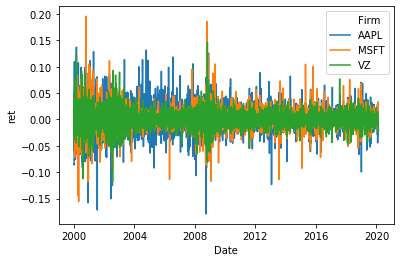

In [48]:
sns.lineplot(data=stock_prices.query('ret>-0.3'),x='Date',y='ret', hue='Firm')

# Use the above for wrangling with the data in the assignment
- Pairplot
- FacetGrid